In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset  = pd.read_csv("C:/Users/dasar.SELVAMDG/Desktop/p/Data_Preprocessing/dataset/LR_dataset/Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
# No missing value
# Both variable are numerical


# Data-Preprocessing

In [6]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [11]:
dataset.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

<Axes: >

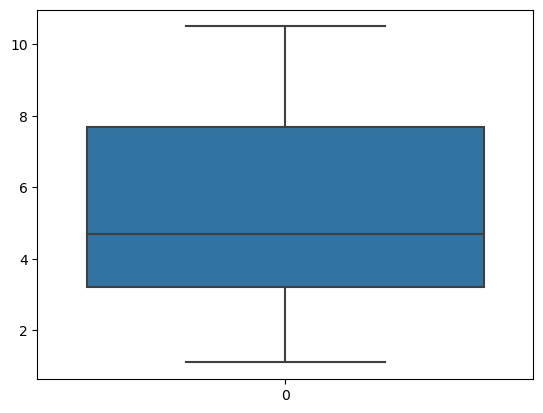

In [8]:
sns.boxplot(dataset['YearsExperience'])

<Axes: >

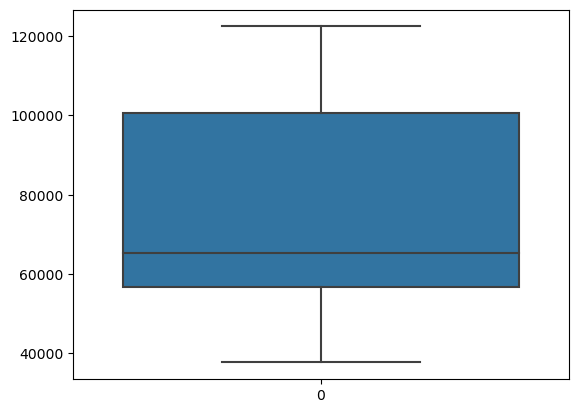

In [9]:
sns.boxplot(dataset['Salary'])

## No outliers in the dataset

### Dataset contain two numerical varables , no encoding processing required in this model

In [13]:
# feature Scaling
dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


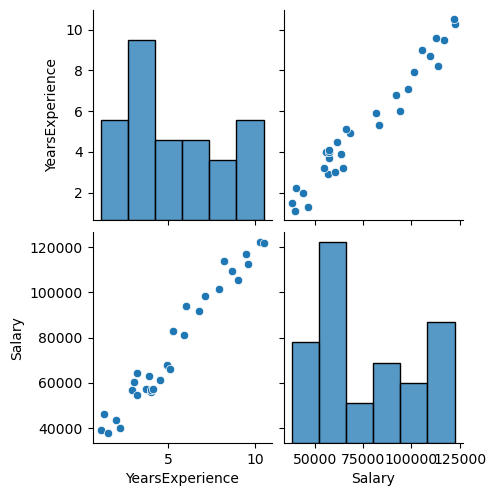

In [14]:
sns.pairplot(dataset)

In [15]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

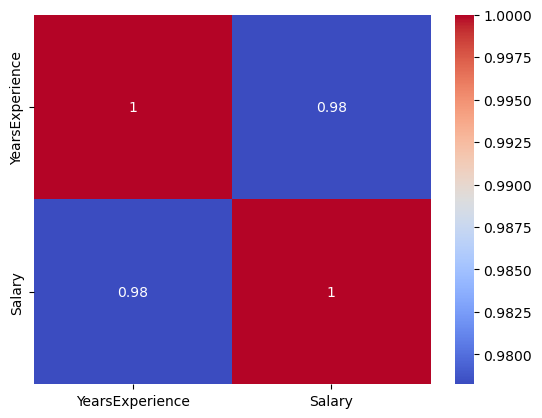

In [20]:
sns.heatmap(dataset.corr(), annot=True, cmap ='coolwarm' )

In [25]:
x = dataset['YearsExperience']
x.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [26]:
y = dataset['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

## Feature scaling 
##### only dependemt variables


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [49]:
x_loc = x.values
x_loc
x_mod = x_loc.reshape(-1,1)
x_reshape = pd.DataFrame(x_mod)
x_reshape.head()

,0
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


# Test and Train Data

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75, random_state = 101)
# Random state should give same test data for different time of spliting
#random state is used to fix the train data during splitting of train and test data

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(22,)
(8,)
(22,)
(8,)


In [43]:
x_train.head()

25     9.0
28    10.3
10     3.9
3      2.0
1      1.3
Name: YearsExperience, dtype: float64

In [44]:
y_train.head()

25    105582.0
28    122391.0
10     63218.0
3      43525.0
1      46205.0
Name: Salary, dtype: float64

# Creating Linear Regression Model with training Data

In [45]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 9.  10.3  3.9  2.   1.3  6.   7.9  4.   2.9  4.5  1.1  7.1  2.2  3.2
  4.1  3.7  4.9 10.5  8.2  3.   5.3  4. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [59]:
from sklearn.model_selection import train_test_split
xr_train, xr_test, yr_train, yr_test = train_test_split(x_reshape,y, train_size = 0.75, random_state = 101)
# Random state should give same test data for different time of spliting
#random state is used to fix the train data during splitting of train and test data

print(xr_train.shape)
print(xr_test.shape)
print(yr_train.shape)
print(yr_test.shape)


(22, 1)
(8, 1)
(22,)
(8,)


In [60]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(xr_train, yr_train)

LinearRegression()

In [61]:
print(lin_reg.intercept_)

26492.258137189623


In [62]:
print(lin_reg.coef_)

[9412.64272211]


# line equation is Y = intercept + coefficient *X
### Y = 26492.258137189623 + 26492.258137189623 * Years of  Experience

# Now predict the y values with test data

In [67]:
yr_pred= lin_reg.predict(xr_test)
yr_pred

array([ 90498.22864751, 108382.24981952,  56612.71484793,  82026.85019762,
        40611.22222035, 116853.62826941, 115912.3639972 ,  74496.73601993])

In [68]:
y_pred= lin_reg.predict(x_test)
y_pred

array([ 90498.22864751, 108382.24981952,  56612.71484793,  82026.85019762,
        40611.22222035, 116853.62826941, 115912.3639972 ,  74496.73601993])

In [75]:
dataframe = pd.DataFrame( (yr_pred - yr_test))
dataframe

,Salary
20,-1239.771352
24,-1048.750180
7,2167.714848
18,663.850198
2,2880.222220
27,4218.628269
26,-1056.636003
16,8467.736020


# Regression Model Evaluation by OLS method


In [76]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [77]:
lin_reg_model = smf.OLS(endog = yr_train, exog= xr_train).fit()

In [78]:
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              614.4
Date:                Sun, 24 Dec 2023   Prob (F-statistic):                    4.94e-17
Time:                        18:14:09   Log-Likelihood:                         -241.45
No. Observations:                  22   AIC:                                      484.9
Df Residuals:                      21   BIC:                                      486.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           1.352e+04    545.624     24.788      0.000    1.24e+04    1.47e+04
==============================================================================
Omnibus:                        0.712   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.647
Skew:                          -0.368   Prob(JB):                        0.724
Kurtosis:                       2.594   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Durbin Watson is less than 1.5, this data should be handled with Time-series forecasting method